In [1]:
from datetime import datetime

import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, pearsonr
import statsmodels.api as sm


%matplotlib inline

In [2]:
df = pd.read_parquet("DataEnhanced.parquet")
print(df.shape)
df.head()

(58829, 45)


,para_id,source,cabinet_ents,date,year,month,day,cabinet,cabinet_no,president,...,president_Energetikos,president_Ekonomikos ir inovacijų,president_Teisingumo,president_Finansų,president_Užsienio reikalų,president_Socialinės apsaugos ir darbo,president_Sveikatos apsaugos,president_Švietimo ir mokslo,"president_Švietimo, mokslo ir sporto",president_Vidaus reikalų
0,614bbf4a4307555f8af6dd8f,https://www.delfi.lt/news/daily/lithuania/zemd...,[Žemės Ūkio],2000-01-27 13:20:46,2000,1,27,,,Valdas Adamkus,...,0,0,0,0,0,0,0,0,0,0
1,614bf1fc4307555f8af74454,https://www.delfi.lt/news/daily/lithuania/liet...,[Prezidentas],2000-02-01 21:30:03,2000,2,1,,,Valdas Adamkus,...,0,0,0,0,0,0,0,0,0,0
2,614b53a14307555f8af628a1,https://www.delfi.lt/news/daily/lithuania/lega...,[Švietimo ir mokslo],2000-02-02 15:55:13,2000,2,2,,,Valdas Adamkus,...,0,0,0,0,0,0,0,0,0,0
3,614bdfcb4307555f8af720cd,https://www.delfi.lt/news/daily/lithuania/rola...,[Prezidentas],2000-02-07 16:00:50,2000,2,7,,,Valdas Adamkus,...,0,0,0,0,0,0,0,0,0,0
4,614ba5d54307555f8af6a8cd,https://www.delfi.lt/news/daily/lithuania/libe...,[Prezidentas],2000-02-07 21:23:02,2000,2,7,,,Valdas Adamkus,...,0,0,0,0,0,0,0,0,0,0


In [3]:
df.columns

Index(['para_id', 'source', 'cabinet_ents', 'date', 'year', 'month', 'day',
       'cabinet', 'cabinet_no', 'president', 'Krašto apsaugos', 'Premjeras',
       'Susisiekimo', 'Žemės Ūkio', 'Kultūros', 'Ūkio', 'Aplinkos ',
       'Energetikos', 'Ekonomikos ir inovacijų', 'Teisingumo', 'Finansų',
       'Užsienio reikalų', 'Prezidentas', 'Socialinės apsaugos ir darbo',
       'Sveikatos apsaugos', 'Švietimo ir mokslo',
       'Švietimo, mokslo ir sporto', 'Vidaus reikalų',
       'president_Krašto apsaugos', 'president_Premjeras',
       'president_Susisiekimo', 'president_Žemės Ūkio', 'president_Kultūros',
       'president_Ūkio', 'president_Aplinkos ', 'president_Energetikos',
       'president_Ekonomikos ir inovacijų', 'president_Teisingumo',
       'president_Finansų', 'president_Užsienio reikalų',
       'president_Socialinės apsaugos ir darbo',
       'president_Sveikatos apsaugos', 'president_Švietimo ir mokslo',
       'president_Švietimo, mokslo ir sporto', 'president_Vidaus rei

# Question 1 : How is presidential attention distributed accross policy spheres?  

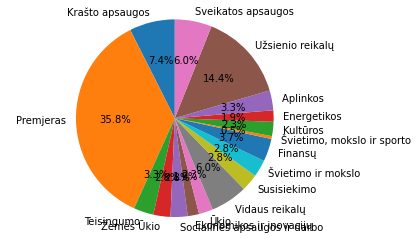

In [4]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
columns = ['president_Krašto apsaugos', 'president_Premjeras',
       'president_Teisingumo', 'president_Žemės Ūkio',
       'president_Socialinės apsaugos ir darbo',
       'president_Ekonomikos ir inovacijų', 'president_Ūkio',
       'president_Vidaus reikalų', 'president_Susisiekimo',
       'president_Švietimo ir mokslo', 'president_Finansų',
       'president_Švietimo, mokslo ir sporto', 'president_Kultūros',
       'president_Energetikos', 'president_Aplinkos ',
       'president_Užsienio reikalų', 'president_Sveikatos apsaugos',]

labels =[i.replace("president_", "") for i in columns]

sizes = [round(df[i].mean()*1000) for i in columns]

data_dict = {labels[index]:i for index, i in enumerate(sizes)}

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [5]:
sorted(data_dict.items(), key = lambda x: x[1], reverse=True)

[('Premjeras', 77),
 ('Užsienio reikalų', 31),
 ('Krašto apsaugos', 16),
 ('Vidaus reikalų', 13),
 ('Sveikatos apsaugos', 13),
 ('Finansų', 8),
 ('Teisingumo', 7),
 ('Aplinkos ', 7),
 ('Žemės Ūkio', 6),
 ('Socialinės apsaugos ir darbo', 6),
 ('Susisiekimo', 6),
 ('Švietimo ir mokslo', 6),
 ('Ūkio', 5),
 ('Kultūros', 5),
 ('Ekonomikos ir inovacijų', 4),
 ('Energetikos', 4),
 ('Švietimo, mokslo ir sporto', 1)]

# Q2: How the attention pattern differs over time?

In [6]:
columns = ['president_Premjeras',
           'president_Užsienio reikalų', 
           'president_Krašto apsaugos', 
            'president_Vidaus reikalų',
          'president_Sveikatos apsaugos',]

agg_dict = {i : "mean" for i in columns}

df2 = df.groupby(["year"]).agg(agg_dict)
print(df2.shape)
df2.head()

(23, 5)


,president_Premjeras,president_Užsienio reikalų,president_Krašto apsaugos,president_Vidaus reikalų,president_Sveikatos apsaugos
year,,,,,
2000,0.025994,0.013761,0.006116,0.006116,0.001529
2001,0.043854,0.023920,0.015947,0.009967,0.009967
2002,0.001006,0.030669,0.016088,0.017094,0.009553
2003,0.010895,0.052108,0.038370,0.020369,0.010895
2004,0.021705,0.043928,0.032558,0.013437,0.008269


<AxesSubplot:xlabel='year'>

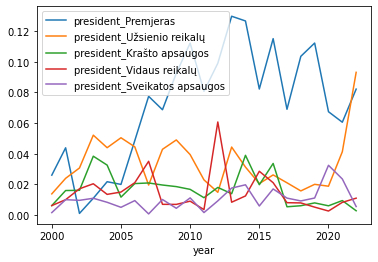

In [7]:
df2.plot.line()

# Q 2.1: Did Grybauskaite pay more attention to FP/DP than others?

In [8]:
df["grybauskaite"] = df.apply(lambda x: int(x["president"] == "Dalia Grybauskaite"), axis = 1)
print(df["grybauskaite"].mean())

dfa = df[df.grybauskaite == 0]
dfb = df[df.grybauskaite == 1]

0.47935541994594505


In [9]:
# Foreign policy

print(dfa["president_Užsienio reikalų"].mean())
print(dfb["president_Užsienio reikalų"].mean())

ttest_ind(list(dfa["president_Užsienio reikalų"]), list(dfb["president_Užsienio reikalų"]))

0.03460772470534461
0.026134751773049646


Ttest_indResult(statistic=5.967785661861288, pvalue=2.418666673581844e-09)

In [10]:
# Defense

print(dfa["president_Krašto apsaugos"].mean())
print(dfb["president_Krašto apsaugos"].mean())

ttest_ind(list(dfa["president_Krašto apsaugos"]), list(dfb["president_Krašto apsaugos"]))

0.015051095367135722
0.016560283687943263


Ttest_indResult(statistic=-1.4676201963618822, pvalue=0.14221276512505931)

# Q 2.2: Does Nauseda pay more attention to healthcare? 

In [11]:
df["nauseda"] = df.apply(lambda x: int(x["president"] == "Gitanas Nausėda"), axis = 1)
print(df["nauseda"].mean())

dfa = df[df.nauseda == 0]
dfb = df[df.nauseda == 1]

0.24472624045963726


In [12]:
# Healthcare

print(dfa["president_Sveikatos apsaugos"].mean())
print(dfb["president_Sveikatos apsaugos"].mean())

ttest_ind(list(dfa["president_Sveikatos apsaugos"]), list(dfb["president_Sveikatos apsaugos"]))

0.009317608930500541
0.025630339654094603


Ttest_indResult(statistic=-14.871224538553697, pvalue=6.247032277932005e-50)

# Does presidential attention mirror media attention?

In [13]:
ministries = ['Krašto apsaugos', 'Premjeras',
       'Teisingumo', 'Žemės Ūkio',
       'Socialinės apsaugos ir darbo', 'Ekonomikos ir inovacijų', 'Ūkio',
       'Vidaus reikalų', 'Susisiekimo', 'Švietimo ir mokslo', 'Finansų',
       'Švietimo, mokslo ir sporto', 'Kultūros', 'Energetikos', 'Aplinkos ',
       'Užsienio reikalų', 'Sveikatos apsaugos',]


ministries2 = ["president_"+i for i in ministries]

ministries_full = ministries + ministries2

agg_dict = {i:"mean" for i in ministries_full}
agg_dict["president"] = "last" 

dfg = df.groupby(["year", "month"]).agg(agg_dict)
dfg["grybauskaite"] = dfg.apply(lambda x:int(x["president"]=="Dalia Grybauskaite"), axis=1)
print(dfg.shape)
dfg.head()

(265, 36)


Krašto apsaugos  Premjeras  Teisingumo  Žemės Ūkio  \
year month                                                       
2000 1             0.000000        0.0    0.000000    1.000000   
     2             0.026316        0.0    0.131579    0.026316   
     3             0.028571        0.0    0.028571    0.057143   
     4             0.111111        0.0    0.111111    0.000000   
     5             0.095238        0.0    0.063492    0.031746   

            Socialinės apsaugos ir darbo  Ekonomikos ir inovacijų      Ūkio  \
year month                                                                    
2000 1                          0.000000                      0.0  0.000000   
     2                          0.026316                      0.0  0.000000   
     3                          0.028571                      0.0  0.114286   
     4                          0.027778                      0.0  0.055556   
     5                          0.079365                      0.0  0.063492   

            Vidaus reikalų  Susisiekimo  Švietimo ir mokslo  ...  \
year month                                                   ...   
2000 1            0.000000     0.000000            0.000000  ...   
     2            0.026316     0.000000            0.026316  ...   
     3            0.142857     0.000000            0.057143  ...   
     4            0.027778     0.055556            0.000000  ...   
     5            0.111111     0.031746            0.047619  ...   

            president_Švietimo ir mokslo  president_Finansų  \
year month                                                    
2000 1                          0.000000                0.0   
     2                          0.000000                0.0   
     3                          0.000000                0.0   
     4                          0.000000                0.0   
     5                          0.015873                0.0   

            president_Švietimo, mokslo ir sporto  president_Kultūros  \
year month                                                             
2000 1                                       0.0            0.000000   
     2                                       0.0            0.000000   
     3                                       0.0            0.000000   
     4                                       0.0            0.000000   
     5                                       0.0            0.015873   

            president_Energetikos  president_Aplinkos   \
year month                                               
2000 1                        0.0                  0.0   
     2                        0.0                  0.0   
     3                        0.0                  0.0   
     4                        0.0                  0.0   
     5                        0.0                  0.0   

            president_Užsienio reikalų  president_Sveikatos apsaugos  \
year month                                                             
2000 1                             0.0                           0.0   
     2                             0.0                           0.0   
     3                             0.0                           0.0   
     4                             0.0                           0.0   
     5                             0.0                           0.0   

                 president  grybauskaite  
year month                                
2000 1      Valdas Adamkus             0  
     2      Valdas Adamkus             0  
     3      Valdas Adamkus             0  
     4      Valdas Adamkus             0  
     5      Valdas Adamkus             0  

[5 rows x 36 columns]

In [14]:
for m in ministries:
    print(m)
    print(pearsonr(dfg[m], dfg["president_"+m]))
    print()
    

Krašto apsaugos
(0.5224210495507013, 5.848316383508324e-20)

Premjeras
(0.7852796338441057, 1.0869636666317255e-56)

Teisingumo
(0.5848303466649483, 1.0371068394627037e-25)

Žemės Ūkio
(0.3414287914302344, 1.1695259011115077e-08)

Socialinės apsaugos ir darbo
(0.4137008103075549, 2.2230874912469332e-12)

Ekonomikos ir inovacijų
(0.8004330588570492, 2.1430570208546248e-60)

Ūkio
(0.8036685963922165, 3.150251000452239e-61)

Vidaus reikalų
(0.7578386586381644, 1.0846489048170717e-50)

Susisiekimo
(0.7001074172067366, 2.3622759762206284e-40)

Švietimo ir mokslo
(0.6652759797067505, 3.078006410474036e-35)

Finansų
(0.5763649454954495, 7.394615166644484e-25)

Švietimo, mokslo ir sporto
(0.7332614381042715, 5.831787982031912e-46)

Kultūros
(0.5464231355170315, 4.971878924082641e-22)

Energetikos
(0.7761810129796337, 1.3168221269956805e-54)

Aplinkos 
(0.7718395633308799, 1.200410324618144e-53)

Užsienio reikalų
(0.663803533223471, 4.890695383304393e-35)

Sveikatos apsaugos
(0.6144745525661881

In [25]:
for m in ministries:
    print(m)
    y = dfg[["president_"+m]]
    X = dfg[[m, "grybauskaite"]]
    X = sm.add_constant(X)
    
    model = sm.OLS(y, X)
    results = model.fit()
    print(results.summary())
    
    print()

Krašto apsaugos
                                OLS Regression Results                               
Dep. Variable:     president_Krašto apsaugos   R-squared:                       0.277
Model:                                   OLS   Adj. R-squared:                  0.272
Method:                        Least Squares   F-statistic:                     50.24
Date:                       Sun, 23 Jan 2022   Prob (F-statistic):           3.39e-19
Time:                               20:41:21   Log-Likelihood:                 760.02
No. Observations:                        265   AIC:                            -1514.
Df Residuals:                            262   BIC:                            -1503.
Df Model:                                  2                                         
Covariance Type:                   nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

# Is presidential attention larger during the first year of presidential term?

In [16]:
dg1b = datetime(2009, 7, 12)
dg1e = datetime(2010, 7, 12)
dg2b = datetime(2014, 7, 12)
dg2e = datetime(2015, 7, 12)
gnb = datetime(2019, 7, 12)
gne = datetime(2020, 7, 12)

first_year = []

for i in df.date:
    plh = 0
    if dg1b <= i < dg1e :
        plh = 1
    if dg2b <= i < dg2e :
        plh = 1
    if gnb <= i < gne :
        plh = 1
    first_year.append(plh)
    
df["first_year"] = first_year
print(df.first_year.mean())

0.18105016233490284


In [17]:
dfa = df[df.first_year == 0]
dfb = df[df.first_year == 1]


In [26]:
for m in ministries2:
    print(m)
    print("Normal: ", dfa[m].mean())
    print("Firsr year: ", dfb[m].mean())
    print(ttest_ind(dfa[m], dfb[m]))
    print()

president_Krašto apsaugos
Normal:  0.016169205861596578
Firsr year:  0.013989296779645104
Ttest_indResult(statistic=1.6339514262952763, pvalue=0.102274401359019)

president_Premjeras
Normal:  0.0716302046577276
Firsr year:  0.10074171439301474
Ttest_indResult(statistic=-10.213537047438884, pvalue=1.8077325931222448e-24)

president_Teisingumo
Normal:  0.007347752086014363
Firsr year:  0.005163834381748193
Ttest_indResult(statistic=2.4548446213300763, pvalue=0.01409742343696923)

president_Žemės Ūkio
Normal:  0.005209846818049732
Firsr year:  0.006947704440897568
Ttest_indResult(statistic=-2.189804576172605, pvalue=0.02854232575853095)

president_Socialinės apsaugos ir darbo
Normal:  0.005458923159948524
Firsr year:  0.009107126091446812
Ttest_indResult(statistic=-4.369616265652839, pvalue=1.2467785875827773e-05)

president_Ekonomikos ir inovacijų
Normal:  0.0022831998007389266
Firsr year:  0.010703220354896254
Ttest_indResult(statistic=-12.785930765139751, pvalue=2.203889902902592e-37)


# Top 5 Spheres for each president

In [21]:
prez_cols = ['president_Užsienio reikalų',
       'president_Vidaus reikalų', 'president_Švietimo ir mokslo',
       'president_Teisingumo', 'president_Sveikatos apsaugos',
       'president_Kultūros', 'president_Premjeras',
       'president_Švietimo, mokslo ir sporto', 'president_Energetikos',
       'president_Ekonomikos ir inovacijų',
       'president_Finansų', 'president_Žemės Ūkio',
       'president_Krašto apsaugos', 'president_Socialinės apsaugos ir darbo',
       'president_Aplinkos ', 'president_Susisiekimo', 'president_Ūkio']

In [22]:
df_adamkus = df[df["president"] == "Valdas Adamkus"]

adamkus_atention_dict = {}
for col in prez_cols:
    adamkus_atention_dict[col] = df_adamkus[col].mean()
    
s_adamkus_atention_dict = sorted(adamkus_atention_dict.items(), key = lambda x : x[1], reverse = True)
s_adamkus_atention_dict[0:5]

[('president_Premjeras', 0.04101182457715911),
 ('president_Užsienio reikalų', 0.036446639724592125),
 ('president_Krašto apsaugos', 0.019009130369705134),
 ('president_Vidaus reikalų', 0.01489298009280048),
 ('president_Finansų', 0.010776829815895825)]

In [23]:
df_grybauskaite = df[df["president"] == "Dalia Grybauskaite"]

grybauskaite_atention_dict = {}
for col in prez_cols:
    grybauskaite_atention_dict[col] = df_grybauskaite[col].mean()
    
s_grybauskaite_atention_dict = sorted(grybauskaite_atention_dict.items(), key = lambda x : x[1], reverse = True)
s_grybauskaite_atention_dict[0:5]

[('president_Premjeras', 0.10319148936170212),
 ('president_Užsienio reikalų', 0.026134751773049646),
 ('president_Krašto apsaugos', 0.016560283687943263),
 ('president_Vidaus reikalų', 0.015815602836879432),
 ('president_Sveikatos apsaugos', 0.010460992907801418)]

In [24]:
df_nauseda = df[df["president"] == "Gitanas Nausėda"]

nauseda_atention_dict = {}
for col in prez_cols:
    nauseda_atention_dict[col] = df_nauseda[col].mean()
    
s_nauseda_atention_dict = sorted(nauseda_atention_dict.items(), key = lambda x : x[1], reverse = True)
s_nauseda_atention_dict[0:5]

[('president_Premjeras', 0.07168160033340279),
 ('president_Užsienio reikalų', 0.030770299367923873),
 ('president_Sveikatos apsaugos', 0.025630339654094603),
 ('president_Ekonomikos ir inovacijų', 0.012780440369521428),
 ('president_Krašto apsaugos', 0.008057234146002639)]